In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv = pd.read_csv("datasets/GlobalLandTemperaturesByCity.csv")
df = pd.DataFrame(csv)

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
df_hun = df[df["Country"] == "Hungary"]

In [6]:
df_hun_city_counts = df_hun.value_counts("City")
df_hun_city_counts

City
Budapest          3239
Debrecen          3239
Gyor              3239
Kecskemét         3239
Miskolc           3239
Nyíregyháza       3239
Pécs              3239
Szeged            3239
Székesfehérvár    3239
Name: count, dtype: int64

In [7]:
hun_cities = df_hun_city_counts.index.tolist()
hun_cities

['Budapest',
 'Debrecen',
 'Gyor',
 'Kecskemét',
 'Miskolc',
 'Nyíregyháza',
 'Pécs',
 'Szeged',
 'Székesfehérvár']

In [8]:
df_hun.isna().sum()

dt                                 0
AverageTemperature               657
AverageTemperatureUncertainty    657
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [9]:
df_hun.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1173275,1743-11-01,4.920,1.946,Budapest,Hungary,47.42N,20.13E
1173280,1744-04-01,12.224,2.341,Budapest,Hungary,47.42N,20.13E
1173281,1744-05-01,14.523,1.703,Budapest,Hungary,47.42N,20.13E
1173282,1744-06-01,17.735,1.594,Budapest,Hungary,47.42N,20.13E
1173283,1744-07-01,19.978,1.574,Budapest,Hungary,47.42N,20.13E
...,...,...,...,...,...,...,...
7318894,2013-04-01,13.318,0.354,Szeged,Hungary,45.81N,19.62E
7318895,2013-05-01,17.666,0.339,Szeged,Hungary,45.81N,19.62E
7318896,2013-06-01,20.683,0.387,Szeged,Hungary,45.81N,19.62E
7318897,2013-07-01,23.342,0.410,Szeged,Hungary,45.81N,19.62E


C:\Users\helit\AppData\Local\Temp\ipykernel_18612\2864147402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hun['dt'] = pd.to_datetime(df_hun['dt'])
C:\Users\helit\AppData\Local\Temp\ipykernel_18612\2864147402.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  city_yearly_avg_temp = df_hun.groupby(['City', pd.Grouper(key='dt', freq='Y')])['AverageTemperature'].mean().reset_index()


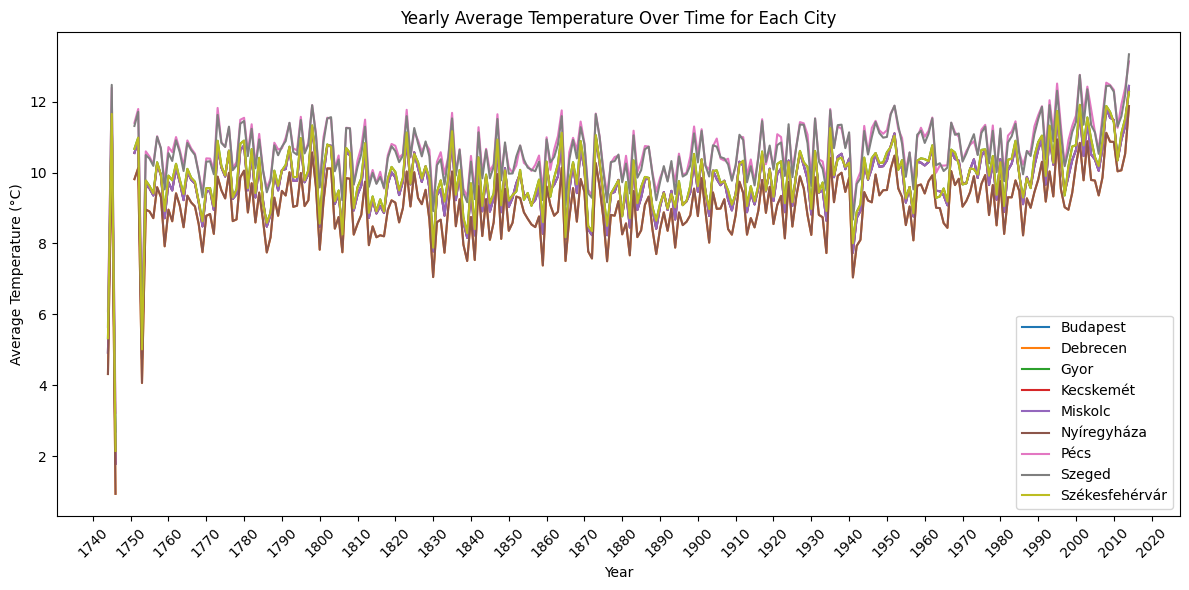

In [10]:
import matplotlib.pyplot as plt

# Convert 'dt' column to datetime format
df_hun['dt'] = pd.to_datetime(df_hun['dt'])

# Group the data by city and resample to calculate yearly mean temperature for each city
city_yearly_avg_temp = df_hun.groupby(['City', pd.Grouper(key='dt', freq='Y')])['AverageTemperature'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for city in city_yearly_avg_temp['City'].unique():
    city_data = city_yearly_avg_temp[city_yearly_avg_temp['City'] == city]
    plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)

# Customize x-ticks to show only decades
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=10))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.title('Yearly Average Temperature Over Time for Each City')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

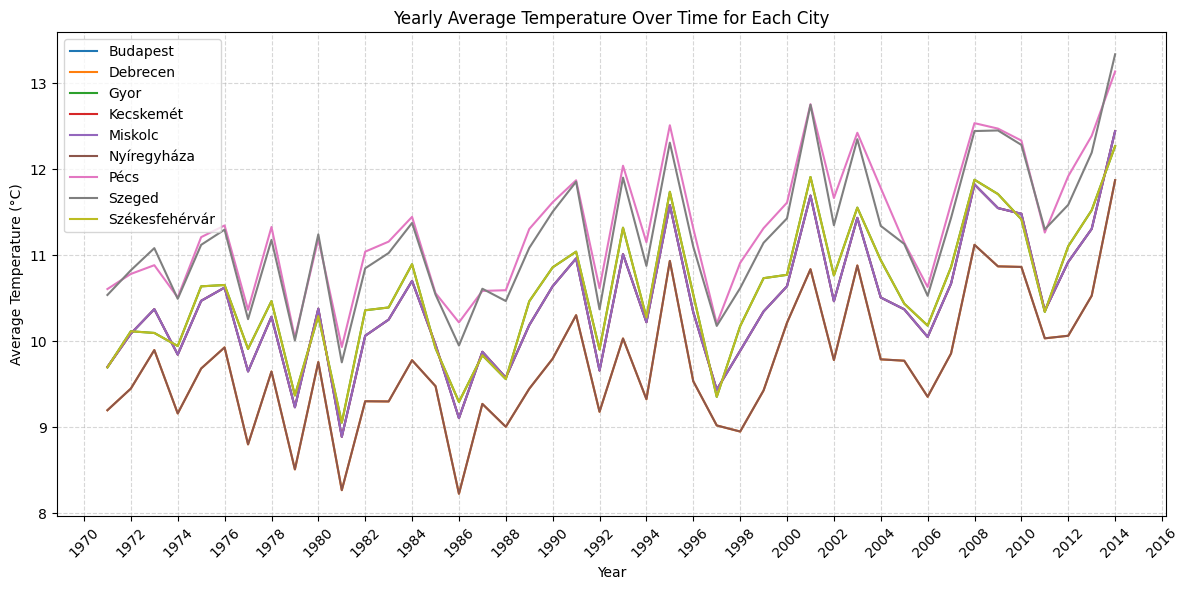

In [11]:
city_yearly_avg_temp = city_yearly_avg_temp[city_yearly_avg_temp['dt'].dt.year >= 1970]

# Plotting
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors

for city in city_yearly_avg_temp['City'].unique():
    city_data = city_yearly_avg_temp[city_yearly_avg_temp['City'] == city]
    plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)

# Customize x-ticks to show only decades
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.title('Yearly Average Temperature Over Time for Each City')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\helit\AppData\Local\Temp\ipykernel_18612\2475167626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hun['dt'] = pd.to_datetime(df_hun['dt'])


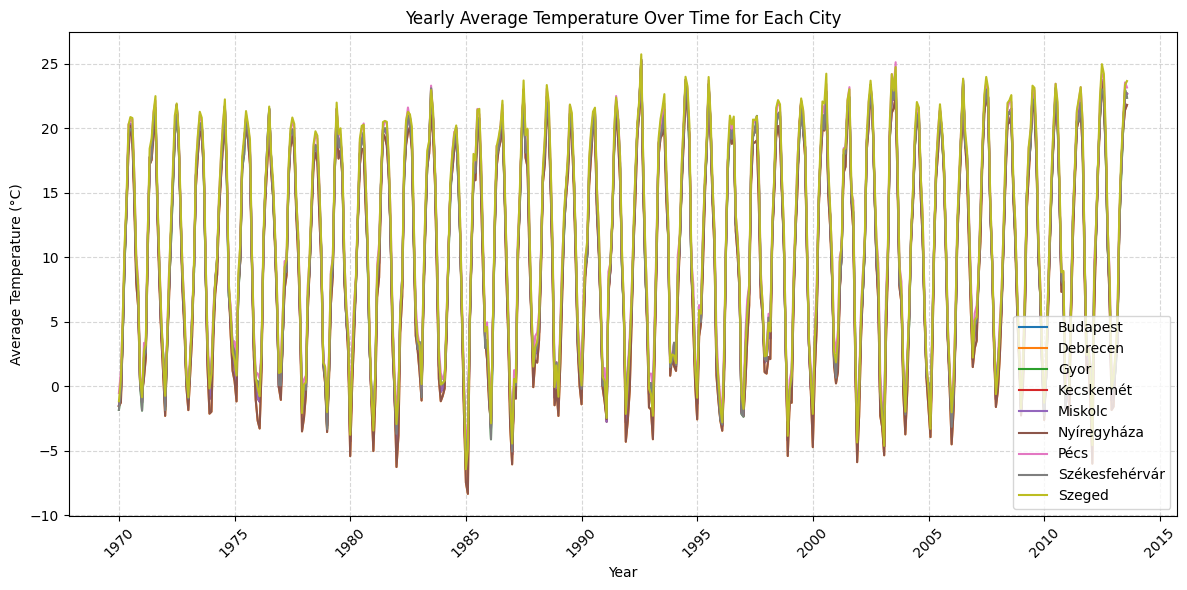

In [12]:
import matplotlib.pyplot as plt

# Convert 'dt' column to datetime format
df_hun['dt'] = pd.to_datetime(df_hun['dt'])

# Filter data from 1970 onwards
df_hun = df_hun[df_hun['dt'].dt.year >= 1970]

# Plotting
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors

for city in df_hun['City'].unique():
    city_data = df_hun[df_hun['City'] == city]
    plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)

# Customize x-ticks to show only decades
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=5))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.title('Yearly Average Temperature Over Time for Each City')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
# Filter the DataFrame for rows where the City is "Budapest"
filtered_to_budapest = df[df['City'] == 'Budapest']
budapest_data = filtered_to_budapest[["dt", "AverageTemperature"]].dropna()
budapest_data

,dt,AverageTemperature
1173275,1743-11-01,4.920
1173280,1744-04-01,12.224
1173281,1744-05-01,14.523
1173282,1744-06-01,17.735
1173283,1744-07-01,19.978
...,...,...
1176508,2013-04-01,12.316
1176509,2013-05-01,16.866
1176510,2013-06-01,20.253
1176511,2013-07-01,22.546


In [14]:
# Write the filtered data to a new CSV file
budapest_data.to_csv("datasets/budapest_data.csv", index=False)

In [15]:
bp_data_2 = pd.read_csv("datasets/budapest_data_2.csv")
df_bp_2 = pd.DataFrame(bp_data_2)

In [16]:
bp_concat = pd.concat([budapest_data, df_bp_2], ignore_index=True)
bp_concat

,dt,AverageTemperature
0,1743-11-01,4.920
1,1744-04-01,12.224
2,1744-05-01,14.523
3,1744-06-01,17.735
4,1744-07-01,19.978
...,...,...
3284,2023-08-01,22.510
3285,2023-09-01,20.080
3286,2023-10-01,13.920
3287,2023-11-01,6.160


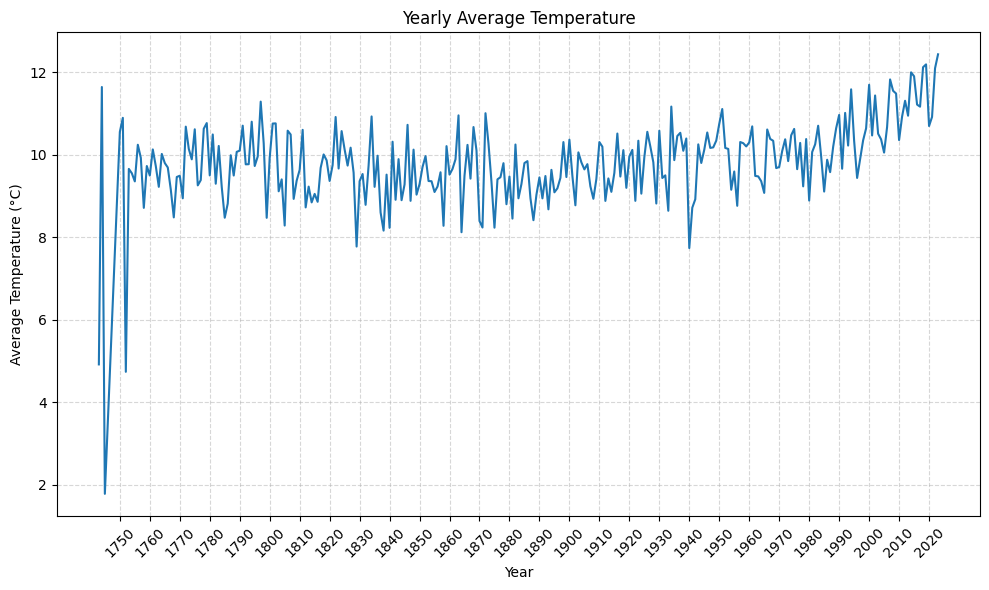

In [17]:
# Convert 'dt' column to datetime format
bp_concat['dt'] = pd.to_datetime(bp_concat['dt'])

# Extract year from 'dt' column
bp_concat['Year'] = bp_concat['dt'].dt.year

# Group by year and calculate the mean temperature for each year
yearly_avg_temp = bp_concat.groupby('Year')['AverageTemperature'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, linestyle='-')
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')

# Extract years divisible by 10 for x-axis ticks
decade_ticks = yearly_avg_temp.index[yearly_avg_temp.index % 10 == 0]

# Set x-axis ticks for every decade
plt.xticks(decade_ticks)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

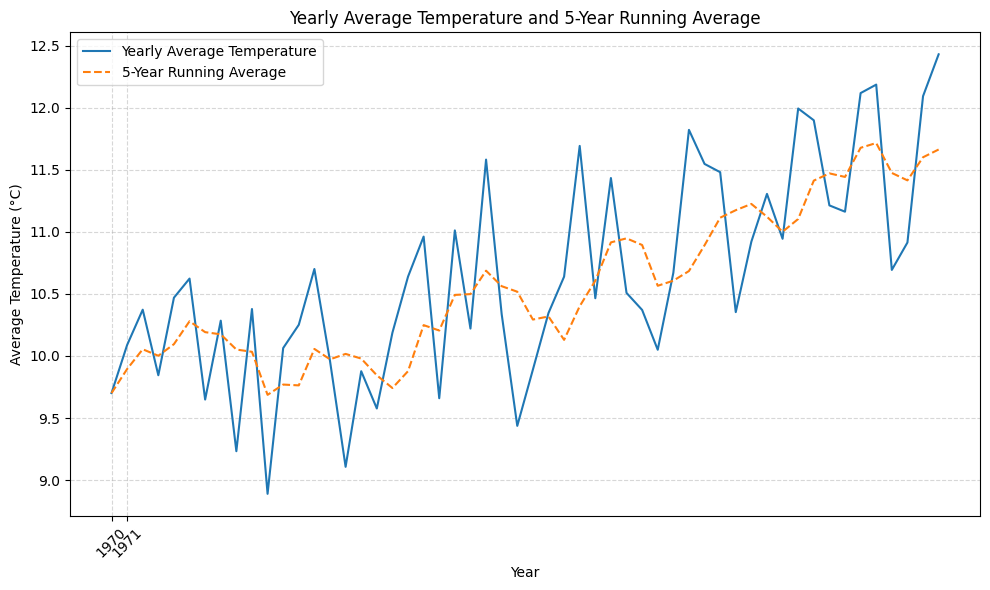

In [18]:
yearly_avg_temp = yearly_avg_temp[yearly_avg_temp.index >= 1970]

# Calculate running average with a window size of 5 (adjust as needed)
running_avg = yearly_avg_temp.rolling(window=5, min_periods=1).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, linestyle='-', label='Yearly Average Temperature')
plt.plot(yearly_avg_temp.index, running_avg, linestyle='--', label='5-Year Running Average')
plt.title('Yearly Average Temperature and 5-Year Running Average')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(yearly_avg_temp.index[:2])
plt.legend()
plt.tight_layout()
plt.show()